# Projeto Integrado CDIA5 - Grupo 3
# Sistema de Arquivo Distribuídos - HDFS e PySpark
# Objetivo de Negócio:

Somos uma empresa que pretende realizar uma campanha de vendas voltada para mulheres de 18 a 40 anos, com foco na venda de máscaras de argila. Como parte da nossa equipe de marketing, conduzimos um estudo abrangente sobre o tema, a fim de identificar os melhores sites para anunciar nossos produtos.

Para isso, utilizamos técnicas avançadas de análise, como web scraping para coleta de dados na web e o pyspark para realizar a contagem de palavras. Com base nessa análise, nosso objetivo é selecionar os 5 melhores sites entre os 20 inicialmente considerados, nos quais iremos direcionar nossos anúncios.

Além disso, faremos a coleta de dados em uma rede social e realizaremos uma análise para compreender quais sites estão mais alinhados com os comentários e interesses do nosso público-alvo. Essa análise nos permitirá direcionar nossas estratégias publicitárias de forma mais efetiva, engajando nossa audiência e impulsionando as vendas dos nossos produtos voltados para cuidados com a pele.

# Coletando dados do Facebook

Para podermos usar o Facebook é necessário ter uma conta, caso contrario conseguimos visualizar apenas uma publicação de cada vez, para resolver esse problema uma conta foi criada para podermos acessar os dados sem mais problemas, essa conta não pertence a ninguém especifico e foi criada apenas para fins da realização desse trabalho.
A url fornecida nos levara diretamente para a área destina a publicações relacionas a máscaras de argila.

In [1]:
#Importações
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os

In [2]:
#Credenciais para acessar o facebook
fb_url = "https://www.facebook.com/search/posts/?q=mascara%20de%20argila&__tsid__=0.5023192808728404&__epa__=SERP_TAB&__eps__=SERP_POSTS_TAB"

user = "yadoji2440@mevori.com"
pw = "mevori.com@yadoji2440"

In [3]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)

driver = webdriver.Chrome(chrome_options=chrome_options)
driver.get(fb_url)
time.sleep(2)
elem = driver.switch_to.active_element
elem.send_keys(user)
elem.send_keys(Keys.TAB)
time.sleep(3)
elem = driver.switch_to.active_element
elem.send_keys(pw)
elem.send_keys(Keys.ENTER)
time.sleep(5)
driver.get(fb_url)
time.sleep(3)

posts = []
old_posts_len = -1
i = 1
while len(posts) > old_posts_len:
    attr = 'data-ad-preview="message"'
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    old_posts_len = len(posts)
    posts = driver.find_elements(By.XPATH, f'//div[@{attr}]')
    time.sleep(1)
    novos_posts = len(posts) - old_posts_len
    #print(f"encontrados {novos_posts} novos posts")
    for post in posts[old_posts_len::]:
        attr = 'role="button"'
        for button in post.find_elements(By.XPATH, f'//div[@{attr}]'):
            if button.text.strip() == "Ver mais":
                #print("clicando no ver mais")
                driver.execute_script("arguments[0].click();", button)
                break
        time.sleep(2)
        with open(f"fb_post_{i+1}.txt", "w", encoding="utf-8") as f:
            f.write(post.text)
        #print(post.text)
        #print(f"finalizado post {i}")
        i += 1
print(f"encontrados {len(posts)} posts")

C:\Users\positivo\AppData\Local\Temp/ipykernel_10376/3371692306.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


encontrados 91 posts


**A aplicação pode demorar a finalizar** 

**Não desligue o computador**

Os posts da coleta inicial não são suficiente então coletaremos de uma segunda URL para complementar nosso projeto.
Uma nova URL é definida e somos direcionados para uma pagina destina a publicações relacionadas a máscara de argila facial.

Sim, os posts mudam.

In [4]:
#Definindo uma nova url
fb_url = "https://www.facebook.com/search/posts/?q=mascara%20de%20argila%20facial"
#Entrando em uma nova url
driver.get(fb_url)
time.sleep(5)

posts = []
old_posts_len = -1
while len(posts) > old_posts_len:
    attr = 'data-ad-preview="message"'
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    old_posts_len = len(posts)
    #time.sleep(1)
    posts = driver.find_elements(By.XPATH, f'//div[@{attr}]')
    time.sleep(1)
    novos_posts = len(posts) - old_posts_len
    #print(f"encontrados {novos_posts} novos posts")
    for post in posts[old_posts_len::]:
        attr = 'role="button"'
        for button in post.find_elements(By.XPATH, f'//div[@{attr}]'):
            try:
                if button.text.strip() == "Ver mais":
                    #print("clicando no ver mais")
                    driver.execute_script("arguments[0].click();", button)
                    break
            except StaleElementReferenceException:
                continue
        time.sleep(3)
        with open(f"fb_post_{i+1}.txt", "w", encoding="utf-8") as f:
            f.write(post.text)
        #print(post.text)
        #print(f"finalizado post {i}")
        i += 1
print(f"encontrados {len(posts)} posts")
driver.quit()

encontrados 86 posts


# Coletando dados de 20 sites

Criaremos uma nova pasta para salvar os sites 

In [ ]:
#Criando uma nova pasta para salvar os sites
try:
    os.makedirs("sites")
except:
    pass

Existem sites que precisam de uma atenção especial em suas coletas, para isso é necessária a criação de 3 funções, as quais serão usadas como parâmetros futuramente.

In [2]:
#Função para excluir classes "divs"
def get_text_exclude_divs(container):
    elements = container.find_elements(By.XPATH, "./*")
    elements = [elem.text for elem in elements if elem.tag_name != "div"]
    return "\n".join(elements)

#Função exclusiva para o site Versatille (Exclui classes "div" e "ul")
def get_text_versatille(container):
    container = container.find_element(By.TAG_NAME, "div")
    elements = container.find_elements(By.XPATH, "./*")
    elements = [elem.text for elem in elements if elem.tag_name != "div" and elem.tag_name != "ul"]
    return "\n".join(elements).replace("LEIA TAMBÉM:", "")

#Função exclusiva para o site stealthelook (exlcui classes "p" e "h2", exclui tambem tudo abaixo do "Leia mais"(Não relevante para o trabalho))
def get_text_stealthelook(container):
    elements = container.find_elements(By.XPATH, "./*")
    elements = [elem.text for elem in elements if elem.tag_name == "p" or elem.tag_name == "h2"]
    return "\n".join(elements).split("LEIA MAIS")[0]

15 site podem ser feitos de maneira simples, fornecendo a url e a Classe, Id ou Xpath que será raspada.

5 sites recebem a url e a Classe ou Xpath que contem o texto principal e uma das funções feitas acima.

In [3]:
#Urls que serão usados para análise
urls = [
    ("https://blog.vizcaya.com.br/tendencias/argiloterapia-capilar-aprenda-como-usar-argila-nos-cabelos/", By.CLASS_NAME, "eltd-post-text-inner", None),
    ("https://www.loreal-paris.com.br/argila-para-o-rosto-saiba-como-inserir-a-mascara-facial-na-sua-rotina-de-cuidados-com-a-pele#:~:text=As%20m%C3%A1scaras%20de%20argila%20devem,e%20antes%20do%20creme%20hidratante.",By.CLASS_NAME, "rich-text", None),
    ("https://terralnatural.com.br/blogs/news/mascara-de-argila", By.CLASS_NAME, "article__content", None),
    ("https://www.dermaclub.com.br/blog/todos-os-temas/argila-verde-branca-preta-como-usar-na-pele-quais-sao-os-tipos-para-que-serve-conheca-os-beneficios_a9283.html", By.CLASS_NAME, "l-blog-article__content", None),
    ("https://quintaldermocosmeticos.com.br/blogs/quintal/argila-beleza-que-vem-do-solo?psafe_param=1&gad=1&gclid=CjwKCAjwvJyjBhApEiwAWz2nLSHEs0mQehb5YPbETSbRzH8-DKBCcLmc0OplQfX_8UOgHQm1sQsPuhoCZJ8QAvD_BwE", By.CLASS_NAME, "rte", None),
    ("https://odia.ig.com.br/d-mulher/2017-01-26/argilas-para-o-rosto-fazem-drenagem-e-desintoxicam-a-pele.html", By.CLASS_NAME, "article-body", None),
    ("https://manipurafarmacia.com.br/mascaras-de-argila-tudo-sobre-elas/", By.CLASS_NAME, "article-inner", None),
    ("https://revistaquem.globo.com/QUEM-Inspira/noticia/2019/05/receita-caseira-aprenda-fazer-mascara-facial-detox-da-blogueira-mari-saad.html", By.CLASS_NAME, "protected-content", None),
    ("https://simpleorganic.com.br/blogs/simple-blog/argila-para-os-rosto-como-usar-e-diluir", By.CLASS_NAME, "Article__Content", None),
    ("https://carenb.com/blogs/beauty-journal/mascara-de-argila-saiba-como-utilizar-e-seus-beneficios", By.CLASS_NAME, "article-template", None),
    ("https://www.ecycle.com.br/limpeza-de-pele-com-argila/", By.ID, "entry-content", None),
    ("https://hidrabene.com.br/post/o-que-a-mascara-de-argila-faz-no-rosto/", By.XPATH, "//div[@class='conteudo has-text-justified']", None),
    ("https://tropicabotanica.com.br/quais-o-tipos-de-argila-indicados-para-cada-rosto/", By.CLASS_NAME, "entry-content", None),
    ("https://mmano.com.br/w/argila-no-cabelo", By.CLASS_NAME, "journal-content-article ", None),
    #Sites que precisam de mais atenção
    ("https://boaforma.abril.com.br/beleza/a-beleza-atraves-das-argilas/", By.CLASS_NAME, "content", get_text_exclude_divs),
    ("https://cabelo.com.br/argila-no-cabelo-veja-os-beneficios-de-usar-o-produto-no-cabelo/", By.CLASS_NAME, "entry-content", get_text_exclude_divs),
    ("https://pontodamulher.com.br/mascara-de-argila-verde", By.CLASS_NAME, "col-lg-9", get_text_exclude_divs),
    ("https://www.belezanaweb.com.br/loucas-por-beleza/como-usar-argila-no-cabelo/", By.CLASS_NAME, "post-content", get_text_exclude_divs),
    ("https://versatille.com/skin-care-3-receitas-caseiras-e-faceis-com-argila-e-oleos-essenciais/", By.CLASS_NAME, "edgtf-post-text", get_text_versatille),
    ("https://stealthelook.com.br/argila-no-cabelo-quais-sao-os-beneficios-e-como-usar-cada-uma-delas/", By.XPATH, "//main/article", get_text_stealthelook),
]

Nessa celula está sendo realizadas as operações de automação usando a biblioteca Selenium WebDriver.
Usaremos o Chrome como navegador.

In [4]:
#Operação automatizada usando Selenium WebDriver
driver = webdriver.Chrome() #Abre um Chrome vazio
for index, url in enumerate(urls): #Enumera as urls
    driver.get(url[0]) #Começa o processo apartir da url 0
    time.sleep(3)
    if url[3] is not None: #Para as urls que necessitam funções
        text = url[3](driver.find_element(url[1], url[2]))
    else: #Se a url não usar função simplesmente extrai o texto usando o seletor url[1] e ur[2]
        text = driver.find_element(url[1], url[2]).text
    with open(f"sites/site{index+1}_content.txt", "w", encoding="utf-8") as f:
        f.write(text)#salva o texto extraído
    time.sleep(3)

driver.quit() #Fecha o navegador e encerra a instância do WebDriver.

Cada site visitado será salvo como arquivos txt's separadamente no diretório onde o arquivo está salvo.
**A aplicação pode levar um longo tempo para ser finalizada.**

# Juntando os arquivos txt

Antes de realizarmos todo o processo PySpark para contagem de palavras precisamos juntar todos os arquivos txt coletados do facebook em um único, para isso usaremos o comando abaixo que juntará todos os arquivos txt's localizados na pasta que o caderno está.

In [34]:
copy fb*.txt merged_fb.txt

fb_post_10.txt
fb_post_100.txt
fb_post_101.txt
fb_post_102.txt
fb_post_103.txt
fb_post_104.txt
fb_post_105.txt
fb_post_106.txt
fb_post_107.txt
fb_post_108.txt
fb_post_109.txt
fb_post_11.txt
fb_post_110.txt
fb_post_111.txt
fb_post_112.txt
fb_post_113.txt
fb_post_114.txt
fb_post_115.txt
fb_post_116.txt
fb_post_117.txt
fb_post_118.txt
fb_post_119.txt
fb_post_12.txt
fb_post_120.txt
fb_post_121.txt
fb_post_122.txt
fb_post_123.txt
fb_post_124.txt
fb_post_125.txt
fb_post_126.txt
fb_post_127.txt
fb_post_128.txt
fb_post_129.txt
fb_post_13.txt
fb_post_130.txt
fb_post_131.txt
fb_post_132.txt
fb_post_133.txt
fb_post_134.txt
fb_post_135.txt
fb_post_136.txt
fb_post_137.txt
fb_post_138.txt
fb_post_139.txt
fb_post_14.txt
fb_post_140.txt
fb_post_141.txt
fb_post_142.txt
fb_post_143.txt
fb_post_144.txt
fb_post_145.txt
fb_post_146.txt
fb_post_147.txt
fb_post_148.txt
fb_post_149.txt
fb_post_15.txt
fb_post_150.txt
fb_post_151.txt
fb_post_152.txt
fb_post_153.txt
fb_post_154.txt
fb_post_155.txt
fb_post_156.tx

Aqui juntaremos apenas os arquivos da pasta sites

In [53]:
copy sites\*.txt sites\merged_sites.txt

sites\site10_content.txt
sites\site11_content.txt
sites\site12_content.txt
sites\site13_content.txt
sites\site14_content.txt
sites\site15_content.txt
sites\site16_content.txt
sites\site17_content.txt
sites\site18_content.txt
sites\site19_content.txt
sites\site1_content.txt
sites\site20_content.txt
sites\site2_content.txt
sites\site3_content.txt
sites\site4_content.txt
sites\site5_content.txt
sites\site6_content.txt
sites\site7_content.txt
sites\site8_content.txt
sites\site9_content.txt
        1 arquivo(s) copiado(s).


# Contando palavras com o PySpark

In [36]:
#Instalando a biblioteca
#!pip install pyspark py4j
#!pip install unidecode
#Importações

from pyspark.sql import SparkSession
from pyspark.sql.functions import split
from pyspark.sql.functions import explode, col
from pyspark.sql.functions import lower
from pyspark.sql.functions import regexp_extract
from pyspark.ml.feature import StopWordsRemover
from nltk.corpus import stopwords
from nltk import ngrams
import nltk
from unidecode import unidecode
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Inicimos uma sessão spark como o nome "Máscara_de_argila_Grupo3" para que possamos utilizar o Spark.

In [37]:
#Iniciando uma sessão no Spark
spark = SparkSession \
          .builder \
          .appName("Máscara_de_argila_Grupo3") \
          .getOrCreate()


spark

Aqui temos uma lista de palavras que não estão no stopwords e precisão ser definidas manualmente.

In [38]:
#Removendo palavras desnecessárias
custom_stopwords = stopwords.words("portuguese")
custom_stopwords.extend(['r', 'nao', 'uso', 'pra', 'ja', 'voce', 'sao', 'disso', 'usar', 'pode', 'assim', 'outras', 'tambem', 'alem', 'fazer', 'vale', 'dia', 'fazer', 'qualquer', 'durante', 'bem', 'antes', 'ainda', 'poucos', 'passo',
                        'opcao', 'pouco', 'seguinte', 'melhor', 'alguns', 'versoes', 'deixar', 'extra', 'eliminar', 'incluir', 'toda', 'aplicar', 'ajuda', 'horas', 'fique', 'mal', 'deixando', 'tratamento', 'dewy', 'dar', 'etapa',
                        'quis', 'so', 'proporcional', 'receber', 'preferem', 'minutinhos', 'levam', 'quanto', 'vai', 'conta', 'deixam', 'ter', 'saiba', 'precisam', 'porque', 'tanto', 'agir', 'perder', 'enquanto', 'nunca', 'indicada',
                        'precisa', 'todas', 'aprenda', 'versao', 'passo', 'preparacao', 'manha', 'descansa', 'regiao', 'pesada', 'proporcional', 'noite', 'diaria', 'sair', 'permitir', 'coisas', 'muitos', 'lembrar', 'escolher', 'passar',
                        'tomando', 'dormidas', 'opcao', 'ocasiao', 'iserir', 'ficando', 'marco', 'falar', 'ouviu', 'descobrir', 'saber', 'hoje', 'ficaram', 'outros', 'varios', 'usadas', 'certeza', 'excesso', 'dias', 'existem', 'concentracao', 'suave',
                        'levemente', 'nada', 'ficar', 'fica', 'conhecidas', 'causa', 'serve', 'usada', 'quer', 'caso', 'sentir', 'tipo', 'vez', 'preciso', 'esqueca', 'devem', 'evitar', 'contem', 'devo', 'geral', 'acao', 'tao', 'ate', 'todos', 'varias',
                        'podem', 'confira', 'cada', 'tipos', 'utiliza', 'sendo', 'utilizado', 'portanto', 'dessa', 'gente', 'duas', 'fins', 'gostou', 'parte', 'seguir', 'otima', 'diferem', 'proximo', 'ha', 'ah', 'ok', 'util', 'passos', 'vao', 'deve',
                        'ai', 'entram', 'tantas', 'acordo', 'dra', 'curi', 'tera', 'neste', 'veja', 'desses', 'atras', 'funcao', 'outro', 'link', 'algum', 'filtro', 'utilizam', 'crm', 'quais', 'deixe', 'devemos', 'sp', 'paulo', 'usou', 'deste', 'tudo',
                        'ne', 'algumas', 'vem', 'aqui', 'onde', 'nesse', 'parar', 'vir', 'ninguem', 'boa', 'toa', 'rio', 'si', 'volta', 'nano', 'post', 'la', 'fim', 'diz', 'causas', 'definir', 'promovendo', 'leia', 'procure', 'adicao', 'fixa', 'utilizadas',
                        'zenna', 'nenhum', 'dica', 'apos', 'c', 'deixa', 'nessa', 'piraja', 'outra', 'ano', 'ir', 'disse', 'quiser', 'sul', 'entao', 'tirar', 'alguem', 'nele', 'menos', 'nenhuma', 'quase', 'estao', 'lado', 'rua', 'apenas', 'opcoes', 'usa',
                        'ira', 'vote', 'ver', 'tiago', 'sabe', 'inves', 'vico', 'nu', 'va', 'stephanie', 'todo', 'siga', 'aloe', 'erick', 'seo', 'dizer', 'total', 'jojoba', 'ficou', 'forma', 'espere', 'obter', 'desde', 'feita', 'item', 'errar', 'algo', 'ajudar',
                        'dimas', 'itajai', 'tendo', 'bom', 'souza', 'blog', 'I', 'x', 'g', 'by', 'm', 'on', 'anne', 'ago', 'mm', 'louise', 'maria', 'irao', 'evite', 'aplicada', 'forma', 'contato', 'assunto', 'atuar', 'use', 'obter', 'melhora', 'atuam', 'lance',
                        'tree', 'suellen', 'anos', 'copaiba', 'saad', 'mari', 'vezes', 'ex', 'leva', 'nisso', 'fazendo', 'cm', 'tres', 'obtidas', 'seque', 'ambas', 'deve', 'inclui', 'voltado', 'quantidade', 'melhores', 'complementar', 'controle',  'promove', 'costumo',
                        'muita', 'partir', 'traz', 'vamos', 'casa', 'ta', 'fez', 'pois', 'sobre', 'apesar', 'local', 'pb', 'ba', 'voltar', 'serem', 'deve', 'inclui', 'unica', 'nesses', 'optar', 'share', 'pois', 'feita', 'sobre', 'age', 'possui', 'atua', 'faz', 'feito',
                        'mesma', 'pre', 'serem', 'cuja', 'usado', 'epoca', 'basta', 'torna', 'acoes', 'formar', 'sobre', 'quero', 'sim', 'deve', 'vendo', 'confia', 'serio', 'fazem', 'refere', 'escolher', 'tratar', 'atua', 'possivel', 'modo', 'aplicacao', 'indicao','traga',
                        'possui', 'casos', 'tal', 'recomenda', 'conte', 'principalmente', 'tida', 'maior', 'span', 'atencao', 'principais', 'aprender', 'hidden', 'misture', 'ajudando', 'ultrapassando', 'entanto', 'profunda', 'formas', 'aplique', 'possibilidade', 'experimentou',
                        'pratica', 'width', 'trata', 'inline', 'conhcidas', 'apesar', 'evitando', 'alguma', 'hora', 'obter', 'ideia', 'atuacao', 'avaliar', 'recomendacao', 'adepta', 'class', 'questoes', 'sempre', 'vimos', 'ohmymag', 'ligada', 'realmente', 'achou', 'px', 'odaban',
                        'controle', 'saiba', 'chamada', 'quebra', 'utiliada', 'equilibrar', 'line', 'passaram', 'sobre', 'manter', 'teor', 'intenso', 'mexa','recurso', 'derivados', 'melhorar', 'tratar', 'retirar', 'area', 'preparar', 'aproveitar', 'sentem', 'aplique', 'espere', 
                        'leve', 'excessiva', 'leves', 'semana', 'finais', 'conheca', 'sugestoes', 'remova', 'meio', 'aplicada', 'tratar', 'vidal', 'expert', 'explica', 'carla', 'feita', 'aplicacao', 'deve', 'minutos', 'exposicao', 'continua', 'estruturado', 'diminuir', 'retirar', 
                        'fatores', 'necessidades', 'otima', 'frequencia', 'ensina', 'possa', 'sera', 'uns', 'alopecia', 'use', 'torna', 'limpar', 'quinze', 'segundo', 'atritar', 'passe', 'psoriase', 'geralmente', 'abra', 'unica', 'regular', 'morna', 'proporcao', 'fala', 'possui',
                        'sabia', 'producao', 'equilibrar', 'trazer', 'sobre', 'muitas', 'comprimento', 'capacidade', 'aplico', 'funciona', 'vera', 'auto', 'rasa', 'trazendo', 'ideal', 'agindo', 'imporante', 'sempre', 'possui', 'boas', 'ayvu', 'possivel', 'livre', 'meio', 'faz',
                        'preparar', 'acertar', 'ativos', 'anote', 'alice', 'pois', 'contra', 'feito', 'possuir', 'alguma', 'momento', 'deve', 'adequa', 'bonus', 'mini', 'adaptado', 'possuem', 'mudam', 'algo', 'essenciais', 'intensa', 'casos', 'porem', 'exige', 'recorrentes',  
                        'manter', 'logo', 'busca', 'jeito', 'aderir', 'sofre', 'novos', 'area', 'aplicada', 'aplique', 'pois', 'age', 'abaixo', 'aumenta', 'tendencia', 'realmente', 'deixara', 'possui', 'producao', 'trazer', 'mundo', 'capacidade'])

Essa é nossa função de limpesa, ordenação e contagem de palavras. 


A função tambem torna tudo minúsculo e remove acentos.


Funcionará para qualquer arquivo.

In [39]:
#Função limpa, ordena e conta palavras
def get_count(filename):
    get_file_content(filename)
    site = spark.read.text(filename)
    lines = site.select(
        split(site.value, " ").alias("line")
    )
    words = lines.select(
        explode(col("line")).alias("word")
    )
    lowered_words = words.select(
        lower(
            col("word")
        ).alias("lowered_word")
    )
    cleaned_words = lowered_words.select(
        regexp_extract(
            col("lowered_word"), # Indico a coluna
            "[a-z]+", # Seleciona somente o que parece uma palavra
            0 # 0 significa dar o match em toda expressão regular
        ).alias("cleaned_word")
    )
    words_nonull = cleaned_words.where(
        col("cleaned_word") != ""
    )
    words_nonull = words_nonull.select(
        col("cleaned_word").alias("word")
    )
    words_lst_df = words_nonull.select(
        split(
            col("word"),
            " "
        ).alias("word")
    )

    swr = StopWordsRemover(
        inputCol="word",
        outputCol="meaningful",
        stopWords=custom_stopwords,
    )
    swr_df = swr.transform(words_lst_df)

    meaningful = swr_df.select(
        (col("meaningful")[0]).alias("meaningful")
    )
    meaningful_nonull = meaningful.where(
        col("meaningful") != "null"
    )
    words_counts = meaningful_nonull.groupby(
        col("meaningful")
    ).count()

    return words_counts.orderBy(
        col("count"),
        ascending=False
    )

Função file que recebe e 'trata' o arquivo que será analisado 

In [40]:
def get_file_content(filename):
    with open(filename, encoding="utf-8") as f:
        merged = f.read()
    with open(filename, "w") as f:
        f.write(unidecode(merged))
    with open(filename, encoding="utf-8") as f:
        return f.read()

Criaremos uma nova pasta para salvar os csv's gerados pelo pyspark para que futuramente possam ser analisados.

In [41]:
#Cria uma pasta "pyspark"
try:
    os.makedirs("pyspark")
except:
    pass

Como dito antes a função funcionara para qualquer arquivo, basta passar seu nome abaixo e a limpesa, ordenação e contagem será feita.
Aqui contamos apenas as palavras retiradas dos posts do facebook.

In [42]:
#Mostrando o resultado do facebook
fb_merged = get_count("merged_fb.txt")
fb_merged.show()

+----------+-----+
|meaningful|count|
+----------+-----+
|      pele|  380|
|    argila|  369|
|   mascara|  262|
|    facial|  137|
|      agua|  102|
|     rosto|   76|
|oleosidade|   69|
|      oleo|   66|
|  produtos|   60|
|hidratante|   57|
|   limpeza|   55|
|    rotina|   54|
|     verde|   52|
|    branca|   50|
|      rosa|   41|
|beneficios|   39|
|       mes|   38|
|  vermelha|   38|
|  sabonete|   37|
|   manchas|   36|
+----------+-----+
only showing top 20 rows



Tambem realizamos essa contagem para cada um dos 20 sites coletados. No caso aqui retornara apenas a contagem do site 10.

In [55]:
#Mostrando o resultado dos sites
artigos = {}
for site in os.listdir("sites"):
    #print(site)
    artigos[site] = get_count(f"sites/{site}")
    #Escolha o site que deseja ver
#artigos["site10_content.txt"].show() 

Para finalizar a contagem de palavras iremos salvar todos os arquivos csv's na pasta pyspark criada anteriormente.

In [56]:
fb_merged.toPandas().to_csv('pyspark/fb_merged.csv')

for i in range(1, 21):
    artigos[f"site{i}_content.txt"].toPandas().to_csv(f'pyspark/site{i}.csv')

### Juntando os arquivos gerados para serem usados posteriormente

In [57]:
#Importações
import glob
import pandas as pd
#Arquivo que será ignorado
ignored_file = 'fb_merged.csv'
#Troque o caminho abaixo pelo local onde os arquivos se encontram
os.chdir("C:/Users/positivo/OneDrive/Documentos/Hanna/PUC/Semestres/5_Semestre/Savino/Projeto 2/Argila_final/Argila_final/pyspark")

In [58]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension)) 
                 if i !=ignored_file]

In [59]:
#combinar todos os arquivos da lista
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#exportar para csv
combined_csv.to_csv("combined_sites.csv", index=False, encoding='utf-8-sig')
os.chdir("..")

# Contagem de termos 
###  Ou palavras frequentemente usadas juntas.

Para a realização dessa tarefa utilizaremos a biblioteca ngramas.

In [71]:
def count_ngrams(filename, n=2):
    termos = get_file_content(filename).replace("\n", " ").split()

    termos = filter(lambda x: x and len(x) > 1, ["".join([c for c in termo.lower() if c.isalpha()]) for termo in termos if termo.lower() not in custom_stopwords])

    # Obtém os bigramas
    bigramas = list(ngrams(termos, n))

    # Conta a ocorrência dos bigramas
    contagem_bigramas = Counter(bigramas)

    # Ordena a contagem dos bigramas pelo valor em ordem decrescente
    return contagem_bigramas.most_common()

Baseado na função a cima realizamos a contagem de termos utilizando a biblioteca ngrams para contar termos frequentemente usados juntos, primeiramente no facebook e posteriormente em cada um dos sites.

In [72]:
import csv

fb_ngrams = count_ngrams("merged_fb.txt")
fb_ngrams.sort(key=lambda x: x[1])
# Abre o arquivo CSV para escrita
with open("pyspark/fb_ngrams.csv", "w", newline="") as file:
    writer = csv.writer(file)
    # Escreve os cabeçalhos
    writer.writerow(["Bigrama", "Contagem"])
    for bigrama, contagem in fb_ngrams:
        writer.writerow([bigrama, contagem])
        print(bigrama, contagem)

('facial', 'ozonizada') 1
('ozonizada', 'auxilia') 1
('auxilia', 'clareamento') 1
('acne', 'rejuvenescimento') 1
('rejuvenescimento', 'facial') 1
('pele', 'oleos') 1
('atendimento', 'home') 1
('home', 'care') 1
('care', 'agende') 1
('agende', 'tfesteticaintegrativa') 1
('tfesteticaintegrativa', 'vemcomathay') 1
('vemcomathay', 'atendimentohomecare') 1
('atendimentohomecare', 'slz') 1
('slz', 'samana') 1
('samana', 'limpezadepele') 1
('limpezadepele', 'facial') 1
('facial', 'atedimentoadomicilio') 1
('atedimentoadomicilio', 'bomdia') 1
('bomdia', 'saoluis') 1
('saoluis', 'saoluisdomaranhao') 1
('saoluisdomaranhao', 'mascaraozonizada') 1
('mascaraozonizada', 'ozonio') 1
('ozonio', 'ozonioterapia') 1
('ozonioterapia', 'ozone') 1
('ozone', 'ozonedermic') 1
('ozonedermic', 'mascaradeargilafacial') 1
('mascaradeargilafacial', 'argilaverde') 1
('argilaverde', 'argilavermelha') 1
('argilavermelha', 'argilaamarela') 1
('argilaamarela', 'chaverde') 1
('chaverde', 'oleodegirassolozonizadoinstagra

('extracao', 'tonificacao') 1
('tonificacao', 'hidratacao') 1
('hidratacao', 'aplicacao') 1
('aplicacao', 'vitamina') 1
('vitamina', 'aplicacao') 1
('aplicacao', 'protetor') 1
('solar', 'mascara') 1
('mascara', 'acalmante') 1
('acalmante', 'ourocarvao') 1
('ourocarvao', 'argila') 1
('argila', 'localizacaohuambo') 1
('localizacaohuambo', 'outubro') 1
('outubro', 'unitel') 1
('unitel', 'segunda') 1
('segunda', 'garagem') 1
('garagem', 'atendimentos') 1
('atendimentos', 'marcacao') 1
('marcacao', 'como') 1
('como', 'sequei') 1
('sequei', 'acnes') 1
('acnes', 'recentes') 1
('recentes', 'dia') 1
('dia', 'gente') 1
('gente', 'voces') 1
('voces', 'conhecem') 1
('conhecem', 'posts') 1
('posts', 'pele') 1
('acneica', 'conhecem') 1
('conhecem', 'vou') 1
('vou', 'primeiro') 1
('primeiro', 'aqui') 1
('aqui', 'httpswwwfacebookcomgroupspermalink') 1
('httpswwwfacebookcomgroupspermalink', 'ultima') 1
('ultima', 'pele') 1
('pele', 'passou') 1
('passou', 'espinhas') 1
('espinhas', 'acreditei') 1
('acre

('branca', 'amazonia') 1
('amazonia', 'mascara') 1
('facial', 'absorve') 1
('absorve', 'oleosidade') 1
('hidrata', 'previne') 1
('previne', 'linhas') 1
('linhas', 'expressoes') 1
('expressoes', 'efeito') 1
('efeito', 'cicatrizante') 1
('cicatrizante', 'rica') 1
('ferro', 'renovar') 1
('celulas', 'ferro') 1
('ferro', 'realizar') 1
('realizar', 'respiracao') 1
('celular', 'absorve') 1
('absorve', 'sebo') 1
('sebo', 'mantem') 1
('mantem', 'poros') 1
('poros', 'limpos') 1
('limpos', 'pele') 1
('pele', 'acido') 1
('acido', 'latico') 1
('latico', 'acido') 1
('salicilico', 'antiinflamatoria') 1
('antiinflamatoria', 'antibacteriana') 1
('antibacteriana', 'esfoliante') 1
('esfoliante', 'detox') 1
('extrato', 'guarana') 1
('guarana', 'poderosa') 1
('poderosa', 'antioxidante') 1
('antioxidante', 'mantem') 1
('indicado', 'para') 1
('para', 'peles') 1
('peles', 'sinais') 1
('sinais', 'linhas') 1
('expressao', 'prevencao') 1
('prevencao', 'envelhecimento') 1
('precoce', 'poros') 1
('poros', 'dilatad

('noturna', 'gel') 1
('limpeza', 'hidratante') 1
('hidratante', 'vitacid') 1
('vitacid', 'glicolico') 1
('glicolico', 'dois') 1
('dois', 'meses') 1
('meses', 'nasceram') 1
('nasceram', 'espinhas') 1
('espinhas', 'iso') 1
('iso', 'manchas') 1
('manchas', 'sairam') 1
('sairam', 'excecao') 1
('excecao', 'fiquei') 1
('fiquei', 'passada') 1
('passada', 'eficacia') 1
('eficacia', 'levei') 1
('levei', 'tempo') 1
('tempo', 'acostumar') 1
('acostumar', 'rosto') 1
('rosto', 'clean') 1
('clean', 'nitidamente') 1
('nitidamente', 'clarokkkk') 1
('clarokkkk', 'dai') 1
('dai', 'isso') 1
('isso', 'duvida') 1
('duvida', 'acidos') 1
('acidos', 'principia') 1
('principia', 'posso') 1
('posso', 'ajudaram') 1
('ajudaram', 'manchas') 1
('manchas', 'vindas') 1
('vindas', 'acne') 1
('acne', 'junto') 1
('junto', 'vitacid') 1
('vitacid', 'rotina') 1
('skincare', 'produtos') 1
('produtos', 'basicos') 1
('basicos', 'bastam') 1
('bastam', 'acidos') 1
('acidos', 'importante') 1
('importante', 'cautela') 1
('cautela

('primeira', 'pele') 1
('macia', 'ebook') 1
('ebook', 'receita') 1
('receita', 'completa') 1
('completa', 'mascaradeargila') 1
('argila', 'cosmeticosnaturais') 1
('cosmeticosnaturais', 'cosmeticonatural') 1
('cosmeticonatural', 'facavocemesmo') 1
('facavocemesmo', 'diy') 1
('diy', 'cosmetologiadobem') 1
('cosmetologiadobem', 'movimentocosmetologiadobem') 1
('movimentocosmetologiadobem', 'cdbeufizrotina') 1
('cdbeufizrotina', 'domingo') 1
('domingo', 'pele') 1
('oleosa', 'esfoliante') 1
('esfoliante', 'rose') 1
('rose', 'sugar') 1
('sugar', 'renovacao') 1
('mortas', 'imperfeicoes') 1
('imperfeicoes', 'preparala') 1
('preparala', 'produtos') 1
('produtos', 'proporcionando') 1
('proporcionando', 'penetracao') 1
('pele', 'garantindo') 1
('garantindo', 'textura') 1
('textura', 'uniforme') 1
('uniforme', 'mascara') 1
('pure', 'empreinte') 1
('empreinte', 'textura') 1
('textura', 'absorve') 1
('absorve', 'impurezas') 1
('impurezas', 'oleosidade') 1
('oleosidade', 'purificando') 1
('purificand

('natural', 'antiinflamatoria') 1
('antiinflamatoria', 'combate') 1
('combate', 'inchaco') 1
('olheiras', 'irritacoes') 1
('irritacoes', 'pele') 1
('pele', 'dicascuidadoscomapele') 1
('dicascuidadoscomapele', 'cuidadoscomapele') 1
('cuidadoscomapele', 'espinhas') 1
('espinhas', 'emcasa') 1
('emcasa', 'mascaradeargila') 1
('mascaradeargila', 'esteticacontagem') 1
('esteticacontagem', 'esteticabh') 1
('esteticabh', 'bomdiamascara') 1
('bomdiamascara', 'argila') 1
('argila', 'hits') 1
('hits', 'skincare') 1
('skincare', 'importante') 1
('importante', 'rotina') 1
('pele', 'divide') 1
('divide', 'diferentes') 1
('diferentes', 'argila') 1
('argila', 'variadas') 1
('variadas', 'aplicacoes') 1
('aplicacoes', 'frequencias') 1
('frequencias', 'objetivos') 1
('objetivos', 'mascara') 1
('argila', 'purificar') 1
('purificar', 'iluminar') 1
('iluminar', 'uniformizar') 1
('uniformizar', 'textura') 1
('textura', 'combater') 1
('combater', 'sinais') 1
('sinais', 'envelhecimento') 1
('envelhecimento', '

('naquela', 'nariz') 1
('nariz', 'dias') 1
('dias', 'comecou') 1
('comecou', 'descamar') 1
('descamar', 'seco') 1
('seco', 'vermelho') 1
('vermelho', 'bateu') 1
('bateu', 'medo') 1
('medo', 'parei') 1
('parei', 'passar') 1
('passar', 'tentei') 1
('tentei', 'ligar') 1
('ligar', 'dermatologistas') 1
('dermatologistas', 'daqui') 1
('daqui', 'santos') 1
('santos', 'dois') 1
('dois', 'atendem') 1
('atendem', 'telefone') 1
('telefone', 'agenda') 1
('agenda', 'dezembro') 1
('dezembro', 'assim') 1
('assim', 'parecido') 1
('parecido', 'recomendar') 1
('recomendar', 'ajudar') 1
('ajudar', 'pensei') 1
('pensei', 'acido') 1
('salicilico', 'azelan') 1
('azelan', 'besteira') 1
('besteira', 'certeza') 1
('certeza', 'edit') 1
('edit', 'famoso') 1
('famoso', 'polvo') 1
('polvo', 'etude') 1
('etude', 'tambem') 1
('tambem', 'esfoliante') 1
('esfoliante', 'rotina') 1
('rotina', 'lido') 1
('lido', 'diariamentedica') 1
('diariamentedica', 'mascara') 1
('naturais', 'mascara') 1
('facial', 'vegana') 1
('vegan

('facial', 'the') 2
('shop', 'amandoooo') 2
('amandoooo', 'caixinha') 2
('caixinha', 'mes') 2
('mes', 'veio') 2
('veio', 'blush') 2
('blush', 'pic') 2
('pic', 'nic') 2
('nic', 'iluminador') 2
('iluminador', 'cat') 2
('cat', 'make') 2
('make', 'mascara') 2
('argila', 'elemento') 2
('elemento', 'gentle') 2
('gentle', 'facial') 2
('facial', 'wash') 2
('wash', 'the') 2
('shop', 'moisture') 2
('moisture', 'crem') 2
('crem', 'the') 2
('shop', 'valeu') 2
('valeu', 'super') 2
('super', 'pena') 2
('pena', 'pro') 2
('pro', 'mes') 2
('mes', 'vem') 2
('vem', 'pretendo') 2
('pretendo', 'perfil') 2
('perfil', 'restrito') 2
('restrito', 'skincare') 2
('skincare', 'cabelo') 2
('cabelo', 'assina') 2
('assina', 'box') 2
('poros', 'pele') 2
('renovar', 'estrutura') 2
('estrutura', 'celulas') 2
('oleosas', 'acne') 2
('acne', 'adstringente') 2
('tonificante', 'estimulante') 2
('estimulante', 'secativa') 2
('bactericida', 'analgesica') 2
('analgesica', 'cicatrizante') 2
('ph', 'pele') 2
('melaleuca', 'masca

('maquiagem', 'frequencia') 2
('frequencia', 'gosto') 2
('gosto', 'preguica') 2
('preguica', 'kkk') 2
('kkk', 'mudei') 2
('mudei', 'completamente') 2
('completamente', 'alimentacao') 2
('alimentacao', 'comecei') 2
('comecei', 'beber') 2
('agua', 'fiz') 2
('fiz', 'pq') 2
('pq', 'acredito') 2
('acredito', 'cremes') 2
('cremes', 'caros') 2
('caros', 'pele') 2
('pele', 'alimentacao') 2
('alimentacao', 'agua') 2
('agua', 'aah') 2
('potencializar', 'beneficios') 2
('conhecida', 'beneficios') 2
('beneficios', 'dela') 2
('dela', 'conto') 2
('conto', 'detox') 2
('oleosidade', 'reduzir') 2
('reduzir', 'tamanho') 2
('tamanho', 'poros') 2
('poros', 'rosto') 2
('rosto', 'efeito') 2
('efeito', 'antioxidante') 2
('antioxidante', 'diminui') 2
('diminui', 'olheiras') 2
('olheiras', 'bolsas') 2
('bolsas', 'olhos') 2
('olhos', 'acne') 2
('acne', 'rosto') 2
('rosto', 'espero') 2
('espero', 'gostado') 2
('gostado', 'comenta') 2
('comenta', 'acha') 2
('acha', 'proxima') 2
('proxima', 'cor') 2
('argila', 'ex

A análise tambem é feita para a junção dos sites.

In [82]:
sites_ngrams = count_ngrams("sites/merged_sites.txt", n=3)
sites_ngrams.sort(key=lambda x: x[1])
sites_ngrams = filter(lambda x: x[1] > 1, fb_ngrams)

# Abre o arquivo CSV para escrita
with open("pyspark/sites_ngrams.csv", "w", newline="") as file:
    writer = csv.writer(file)
    # Escreve os cabeçalhos
    writer.writerow(["Bigrama", "Contagem"])
    # Escreve os dados no arquivo CSV
    for bigrama, contagem in sites_ngrams:
        writer.writerow([bigrama, contagem])
        print(bigrama, contagem)

('galerinha', 'pretendo') 2
('pretendo', 'primeira') 2
('primeira', 'mascara') 2
('manchas', 'espinha') 2
('espinha', 'duvidas') 2
('duvidas', 'posso') 2
('posso', 'soro') 2
('fisiologico', 'lugar') 2
('lugar', 'agua') 2
('agua', 'misturar') 2
('misturar', 'po') 2
('pele', 'posso') 2
('posso', 'sabonete') 2
('effaclar', 'roche') 2
('roche', 'depois') 2
('depois', 'tonico') 2
('tonico', 'posso') 2
('posso', 'hidratante') 2
('facial', 'mascara') 2
('mascara', 'conjuntinho') 2
('conjuntinho', 'pretendo') 2
('pretendo', 'usar') 2
('usar', 'bom') 2
('bom', 'duvidas') 2
('duvidas', 'hahaha') 2
('hahaha', 'puderem') 2
('puderem', 'ficarei') 2
('ficarei', 'grata') 2
('grata', 'obrigada') 2
('clareamento', 'acne') 2
('facial', 'blend') 2
('blend', 'argilas') 2
('argilas', 'especie') 2
('especie', 'cataplasma') 2
('cataplasma', 'tecido') 2
('tecido', 'favorecendo') 2
('favorecendo', 'remocao') 2
('remocao', 'toxinas') 2
('toxinas', 'impurezas') 2
('disso', 'entrega') 2
('entrega', 'aporte') 2
('

('vichy', 'tonico') 2
('tonico', 'the') 2
('ordinary', 'blend') 2
('oleos', 'hidratante') 2
('hidratante', 'timewise') 2
('timewise', 'mary') 2
('kay', 'noturno') 2
('noturno', 'ficarem') 2
('ficarem', 'duvida') 2
('duvida', 'tento') 2
('oleosidade', 'hidrata') 2
('minutos', 'lavar') 2
('hidratacao', 'pele') 2
('natural', 'argila') 2
('toxinas', 'pele') 2
('facial', 'ak') 2
('pele', 'merece') 2
('pele', 'combate') 2
('bem', 'pele') 2
('comentario', 'embaixo') 2
('acalma', 'nutre') 2
('pincel', 'mascaras') 2
('juventude', 'pele') 2
('pele', 'mascara') 2
('peles', 'mistas') 2
('mistas', 'oleosas') 2
('argila', 'esfoliante') 2
('uniformiza', 'pele') 2
('pele', 'hidratada') 2
('pele', 'autoestima') 2
('faixa', 'cabelo') 2
('rosto', 'minutos') 2
('mosqueta', 'protetor') 2
('pele', 'desobstrui') 2
('resolvi', 'testar') 2
('paguei', 'reais') 2
('lavo', 'rosto') 2
('agua', 'gelada') 2
('especifico', 'pele') 2
('bata', 'gel') 2
('colheres', 'sopa') 2
('proprias', 'maos') 2
('receitas', 'caseira

('agua', 'textura') 4
('cremosa', 'aplicar') 4
('aplicar', 'fina') 4
('fina', 'camada') 4
('camada', 'lugar') 4
('lugar', 'tratamento') 4
('tratamento', 'controlar') 4
('controlar', 'hidratacao') 4
('hidratacao', 'mascara') 4
('mascara', 'pulverizacao') 4
('pulverizacao', 'agua') 4
('apos', 'minutos') 4
('mascara', 'gaze') 4
('gaze', 'algodao') 4
('algodao', 'embebecido') 4
('embebecido', 'agua') 4
('mineral', 'para') 4
('para', 'finalizar') 4
('finalizar', 'oleo') 4
('gota', 'oleo') 4
('facial', 'vitamina') 4
('pele', 'visivelmente') 4
('agua', 'abundancia') 4
('acido', 'salicilico') 4
('pele', 'extracao') 4
('carvao', 'ativado') 4
('peeling', 'diamante') 4
('passava', 'mascara') 4
('lavava', 'rosto') 4
('rotina', 'diurna') 4
('box', 'magenta') 4
('itens', 'beleza') 4
('pele', 'beneficios') 4
('vermelha', 'mascara') 4
('expressao', 'argila') 4
('rica', 'ferro') 4
('elasticidade', 'pele') 4
('peles', 'envelhecidas') 4
('radicais', 'livres') 4
('rica', 'oxido') 4
('recipiente', 'coloque

# Dashboard
### Análise inicial dos dados 

Inicialmente iremos apresentar de forma simples nossos dados iniciais.
Nossa primeira nuvem de palavras geradas do arquivo facebook mostram as palavras que parecem ser mais relevantes para nosso contexto de negocio.

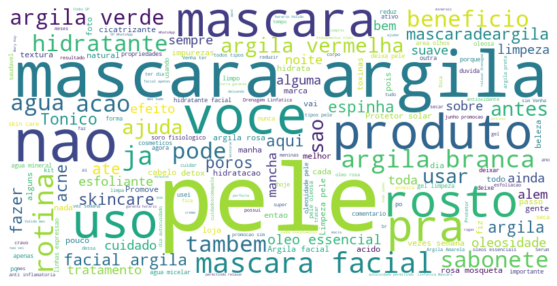

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ler o arquivo de texto
with open('merged_fb.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenizar o texto em palavras
tokens = word_tokenize(texto, language='portuguese')

# Carregar as stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover as stopwords do texto
tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]

# Unir os tokens sem stopwords novamente em um único texto
texto_sem_stopwords = ' '.join(tokens_sem_stopwords)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stopwords)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Aqui uma nuvem de palavras para a junção de todos os 20 sites.

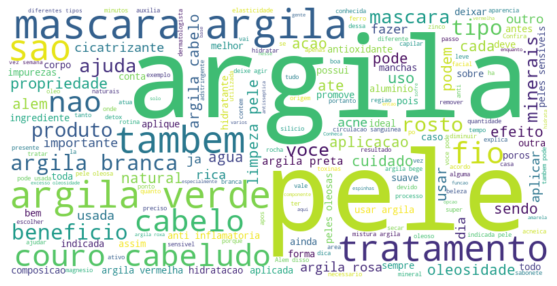

In [77]:
# Ler o arquivo de texto
with open('sites/merged_sites.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenizar o texto em palavras
tokens = word_tokenize(texto, language='portuguese')

# Carregar as stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover as stopwords do texto
tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]

# Unir os tokens sem stopwords novamente em um único texto
texto_sem_stopwords = ' '.join(tokens_sem_stopwords)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stopwords)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Com a análise inicial podemos ver que as palavras são bem similares tanto na rede social quanto nos sites escolhidos, ambos possuem palavras como pele, argila, hidratante, limpeza, oleosidade entre outras.

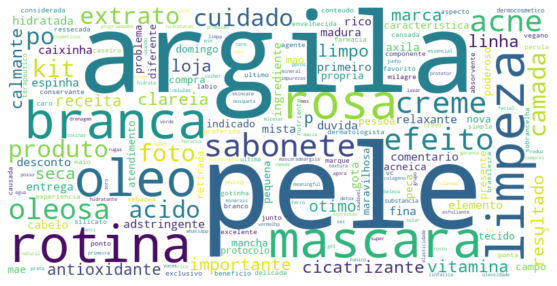

In [78]:
# Ler o arquivo de texto
with open('pyspark/fb_merged.csv', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenizar o texto em palavras
tokens = word_tokenize(texto, language='portuguese')

# Carregar as stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover as stopwords do texto
tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]

# Unir os tokens sem stopwords novamente em um único texto
texto_sem_stopwords = ' '.join(tokens_sem_stopwords)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stopwords)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

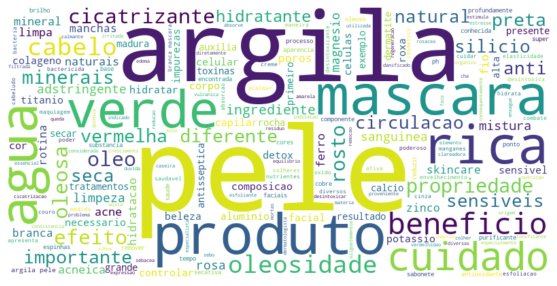

In [79]:
# Ler o arquivo de texto
with open('pyspark/combined_sites.csv', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenizar o texto em palavras
tokens = word_tokenize(texto, language='portuguese')

# Carregar as stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Remover as stopwords do texto
tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]

# Unir os tokens sem stopwords novamente em um único texto
texto_sem_stopwords = ' '.join(tokens_sem_stopwords)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stopwords)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()